## Install Mudi

In the future, `mudi` will be distributed via PyPi. For now, install as follows in `/PATH_TO_DIR/mudi/`:

```python

pip install -e .

```

In [1]:
import os
import pandas as pd
import scanpy as sc

# Needed because Numba has gotten annoying with its warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_DIR = '/home/sanand/gtex_single_cell/eli'

#### Load Metadata

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'ref', 'ten_sample_metadata.tsv'), sep='\t')
df.head(2)

,Unnamed: 0,gtex_sample_id,path_to_bcl_platform,flowcell_id,raw_path,filt_path,cb,dup,sample
0,1,GTEX-13VXT-5007-SM-IFRQQ_2,/seq/illumina/proc/SL-NXA/190307_SL-NXA_1180_A...,190307_SL-NXA_1180_AHTL5VBGX9,../LV/sample_matrices/GTEX-13VXT-5007-SM-IFRQQ...,../LV/sample_matrices/GTEX-13VXT-5007-SM-IFRQQ...,./cellbender/heart_gtex_sc/GTEX-13VXT-5007-SM-...,2,GTEX-13VXT-5007-SM-IFRQQ
1,12,GTEX-15RJ7-5001-SM-IFRQS_1,/seq/illumina/proc/SL-NXA/190307_SL-NXA_1180_A...,190307_SL-NXA_1180_AHTL5VBGX9,../LV/sample_matrices/GTEX-15RJ7-5001-SM-IFRQS...,../LV/sample_matrices/GTEX-15RJ7-5001-SM-IFRQS...,./cellbender/heart_gtex_sc/GTEX-15RJ7-5001-SM-...,1,GTEX-15RJ7-5001-SM-IFRQS


#### Get List of Input Matrices

In [4]:
file_names = [
    os.path.join(DATA_DIR, 'analysis','cellbender','heart_gtex_sc', x) for 
    x in 
    os.listdir(os.path.join(DATA_DIR, 'analysis','cellbender','heart_gtex_sc'))
]

print("Example output .h5 file from cellbender: \n{}".format(file_names[0]))

Example output .h5 file from cellbender: 
/home/sanand/gtex_single_cell/eli/analysis/cellbender/heart_gtex_sc/GTEX-12WSN-5001-SM-IFRQO_2_out_filtered.h5


### Using Mudi

For testing, we only look at the first 3 inputs.

In [5]:
from mudi.process import recipe

In [6]:
adata = recipe(
    file_names[:3],
    min_genes=200,
    min_cells=3,
    thresh=2.25,
    mito_thresh=None,
    verbose=True,
    bbknn='batch'
)

Combining 3 inputs.


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Making variable names unique for controlled concatenation.


... storing 'phase' as categorical


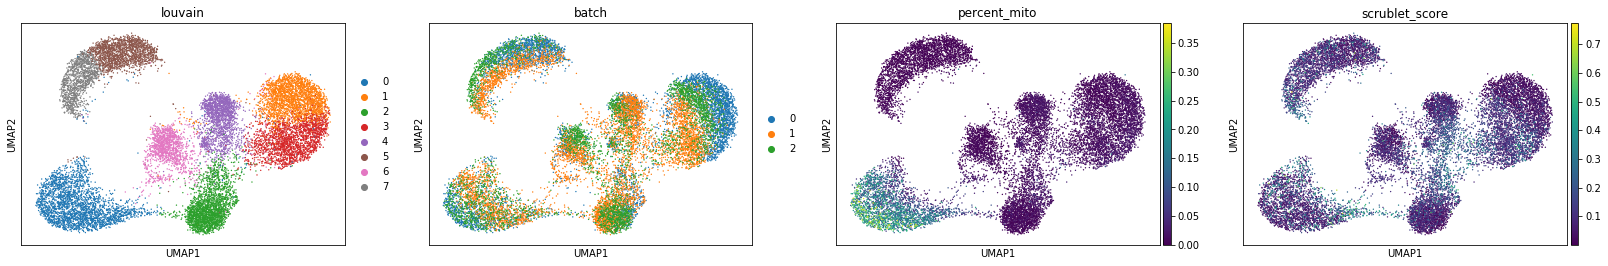

In [7]:
sc.pl.umap(adata, color=['louvain','batch', 'percent_mito','scrublet_score'])

### Labeling Cell Types

This process is imperfect and is meant for a quick, rapid assignment for known markers. It is based on differentially expressed genes. It requires an annotated dataframe.

In [8]:
from mudi.markers import build_marker_set, sub_cluster_and_rename

In [9]:
heart_markers = pd.read_csv(os.path.join(DATA_DIR, 'ref/gtex_heart_markers.tsv'),sep='\t')

In [10]:
scores, aggr, labels = build_marker_set(adata, heart_markers, groupby='louvain', thresh=1e-2)

... storing 'phase' as categorical


... storing 'cell_type' as categorical


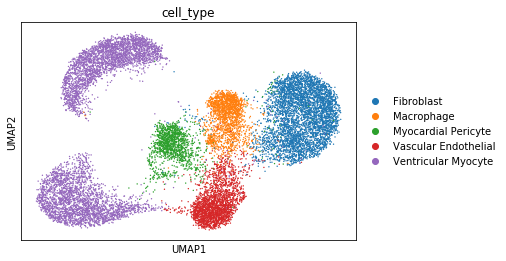

In [11]:
sc.pl.umap(adata, color=['cell_type'])

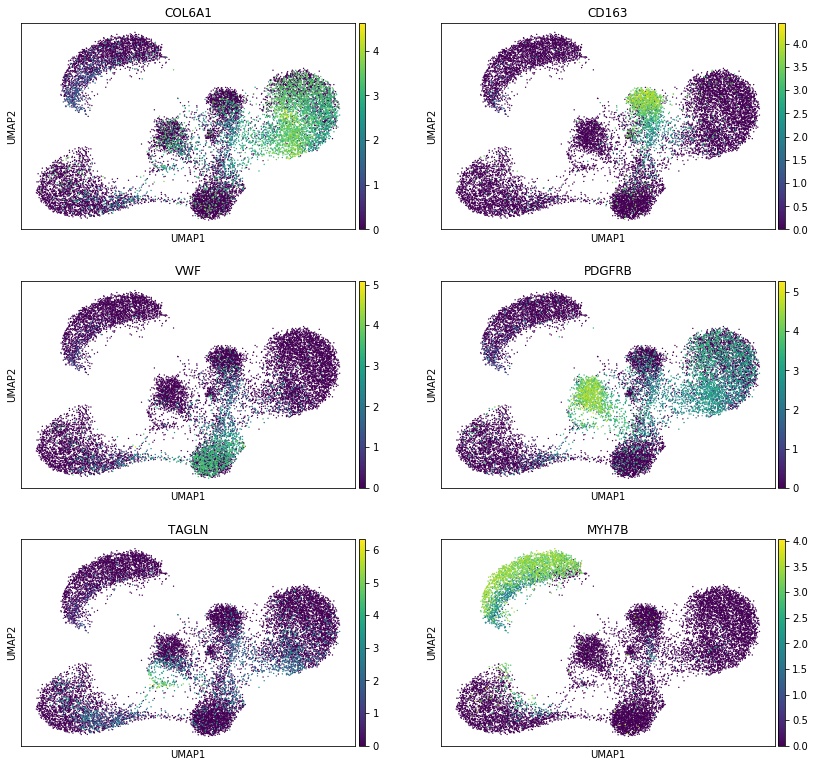

In [14]:
sc.pl.umap(adata, color=['COL6A1','CD163','VWF','PDGFRB','TAGLN','MYH7B'], ncols=2)

In [16]:
scores.head()

,Fibroblast,T cell,Myocardial Pericyte,B memory,Vascular Endothelial,Myofibroblast,Macrophage,T cell (CD4),B cell,Monocytes (CD14+),...,T cell_helper,Conduction Cell,Mast Cell,Ventricular Myocyte,Smooth Muscle,Lymphatic Endothelial,T cell (Activated),Monocytes (FCGR3A+),Dendritic Cell,NK Cell
1,156.410477,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
3,371.993011,-1.0,-1.000000,-1.0,-1.000000,31.571590,-1.000000,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.000000,-1.0,90.967369,-1.0,-1.000000,-1.000000,28.505087,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.000000,58.381699,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.000000,-1.0,-1.000000,-1.0,180.252075,-1.000000,-1.000000,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.000000,-1.0,-1.000000,-1.0,-1.000000,30.663677,-1.000000,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,360.831787,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0


In [17]:
aggr.head(5)

,cluster,no.,names,scores,pvals,pvals_adj,logfoldchanges,cell_type,label
100,1,0,DCN,84.330490,0.000000e+00,0.000000e+00,4.978022,Fibroblast,Fibroblast
131,1,31,FN1,22.137506,1.511074e-103,2.865815e-101,1.951114,Fibroblast,Fibroblast
144,1,44,PDGFRA,17.407057,2.236470e-65,2.269235e-63,2.074307,Fibroblast,Fibroblast
149,1,49,COL1A2,16.719894,5.240478e-61,4.811992e-59,1.589204,Fibroblast,Fibroblast
155,1,55,VIM,15.815522,6.359031e-55,5.141188e-53,1.436674,Fibroblast,Fibroblast


### Sub-clustering

Subclsutering can be done using the function `sub_cluster_and_rename` to fine-tune annotations rapidly:

```python

genes_df = sub_cluster_and_rename(adata, 'louvain', ['Myocardial Perciyte'], heart_markers)

```

For example, in the above example we have the red clsuter annotated as `Myocardial Perciyte`, but if we subcluster we see that there is likely some smooth muscle or adipocyte character in the small cluster to the side.

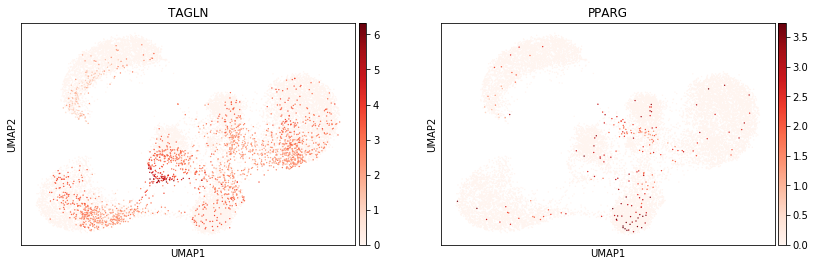

In [18]:
sc.pl.umap(adata, color=['TAGLN','PPARG'], cmap='Reds')

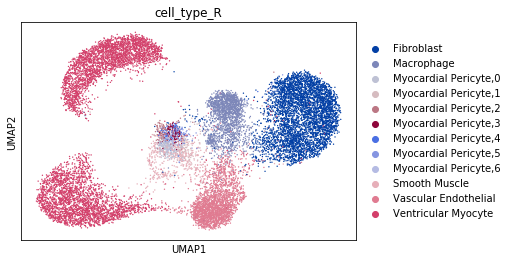

... storing 'cell_type_R' as categorical


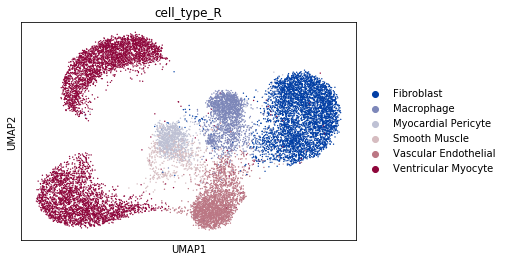

In [27]:
_ = sub_cluster_and_rename(adata, 'cell_type', ['Myocardial Pericyte'], heart_markers)